<a href="https://colab.research.google.com/github/ashwith-nagendra/IIITH-AIML/blob/main/AIML_Module_2_Lab_3_Manifold_Learning_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [ ]:
n_points = 100
X, color = datasets.make_s_curve(n_points, random_state=0)

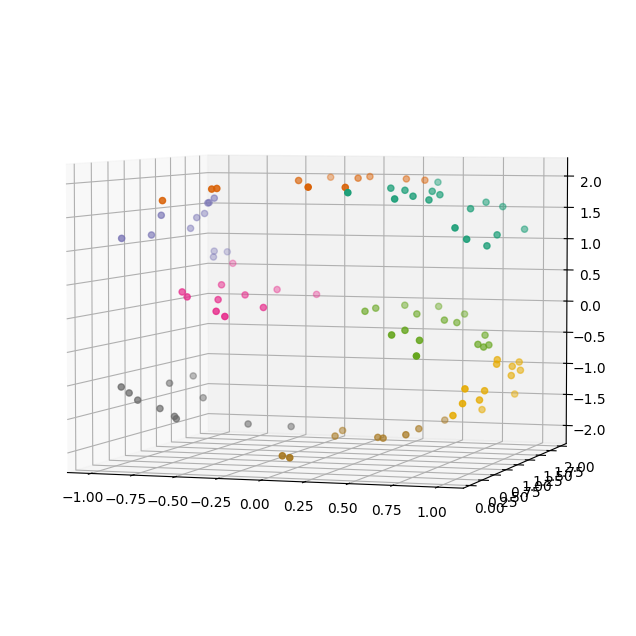

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Dark2)
ax.view_init(4, -72)

In [ ]:
def dist(a, b):
  '''Computes Euclidean distance between 2 points'''
  return np.sqrt(sum((a - b) ** 2))

distances = np.array([[dist(p1, p2) for p2 in X] for p1 in X])
print(distances.shape)

(100, 100)


In [ ]:
# Lets keep only the 10 nearest neighbors, others set to 0 (= unreachable)

n_neighbors = 5
neighbors = np.zeros(distances.shape)

sort_distances = np.argsort(distances, axis=1)[:, 1:n_neighbors+1]
for k,i in enumerate(sort_distances):
    neighbors[k,i] = distances[k,i]

In [ ]:
neighbors.shape

(100, 100)

In [ ]:
from scipy.sparse.csgraph import shortest_path

graph = shortest_path(neighbors, directed=False)

In [ ]:
gram = (graph ** 2)

In [ ]:
n_samples = gram.shape[0]

# Mean for each row/column
meanrows = np.sum(gram, axis=0) / n_samples
meancols = (np.sum(gram, axis=1)/n_samples)[:, np.newaxis]

# NUMPY TRICKS: np.newaxis is used to increase the dimension of the existing array by one more dimension. So a (100,) matrix becomes a (100,1) matrix.

# Mean across all rows (entire matrix)
meanall = meanrows.sum() / n_samples

gram -= meanrows
gram -= meancols
gram += meanall

In [ ]:
# Using the np.linalg.eig() to compute eigenvectors and eigenvalues for the matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(gram)

# We will be sorting the eigenvalues and to preserve the corresponding eigenvectors, let us make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))]

# We want to reduce the dimensionality to **n_components** dimensions, therefore we will be first taking the top **n_components** eigenvectors (sorted in descending by eigenvalues)
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pa_chebyshevirs = np.array(eig_pairs, dtype=object)

# Transforming the matrix (dimensionality reduction)
n_components = 2

reduced_matrix = np.zeros((n_components, gram.shape[1]))
for i in range(n_components):
  reduced_matrix[i,:] = eig_pa_chebyshevirs[i,1]
reduced_matrix = reduced_matrix.T

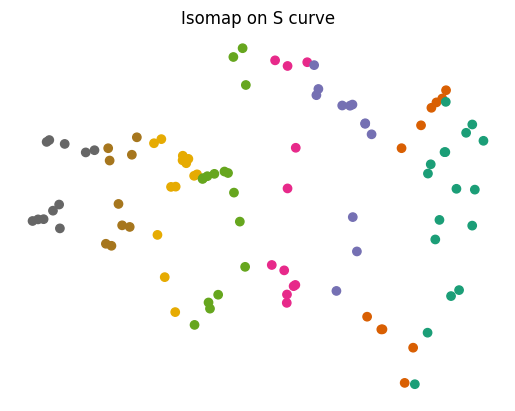

In [ ]:
ax = fig.add_subplot(111)
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=color, cmap=plt.cm.Dark2)
plt.title("Isomap on S curve")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.manifold import Isomap

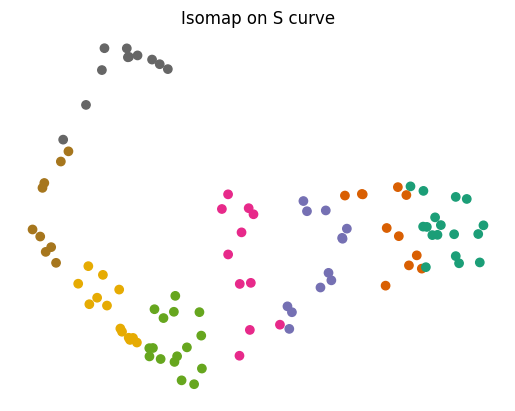

In [ ]:
Y = Isomap(n_neighbors=10, n_components=2).fit_transform(X)

ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Dark2)
plt.title("Isomap on S curve")
plt.axis('off')
plt.show()

Exercises:

1. Effect of Number of Neighbors on the Isomap Algorithm
The Isomap (Isometric Mapping) algorithm is a non-linear dimensionality reduction technique that aims to preserve the global geometric structure of data by approximating the manifold distance between points using geodesic distances. The number of neighbors (often denoted as k) plays a crucial role in determining the local geometry that Isomap captures. Here's how the number of neighbors can impact the algorithm.

2. Isomap can be superior to PCA when:

Non-linear Structure: Isomap is effective when the data lies on a non-linear manifold. PCA is a linear technique and only works well when the data lies approximately on a linear subspace. If the data has a non-linear relationship (such as images of faces, or time-series data with complex relationships), Isomap is better at capturing the underlying structure.

Preserving Global Geometry: Unlike PCA, which only considers local covariances, Isomap aims to preserve the global geometric structure of the data by capturing geodesic distances. This makes it more suitable for data with complex global structures.

3. There are several other manifold learning techniques that go beyond Isomap. One common method is t-SNE (t-distributed Stochastic Neighbor Embedding):

t-SNE (t-distributed Stochastic Neighbor Embedding):
t-SNE is another non-linear dimensionality reduction technique, but it focuses more on preserving local neighborhood structure rather than global structure, which is different from Isomap. t-SNE attempts to map similar points in the high-dimensional space to nearby points in the low-dimensional space.

4.Dealing with Missing Data in Manifold Learning
Missing data is a common issue in many machine learning tasks, and manifold learning methods can be sensitive to missing values. Here are some strategies for handling missing data in manifold learning:
Imputation,
Subspace Methods,
Modified Manifold Learning Algorithms,
Data Augementation.